# Build a classifier to determine whether a news article is fake or real

You are a new an AI Engineer, task with building an AI/ML classifier that helps politicians determine whether news articles trending on social media are fake or real.

Follow an approach similar to what we took in class, which looks something like the below.

- Preprocess the data
    - Remove stop words
    - Remove unwanted characters
    - Stemining
    - ...
- Split data between training and test sets
- Modeling strategies
    - Bag of words modeling including TF-IDF using traditional ML
    - LST modeling
    - Transformer modeling
    
Recommend the best model based on relevant metrics of your choice. Be sure to explain your rational, including relevant visualizations at every steps of your work

Minimal starter code has been provided below     

In [1]:
import pandas as pd

# Load the  Data

In [2]:
Fake=pd.read_csv("./Fake.csv")
true=pd.read_csv("./True.csv")

- Give the fake news label 0 :

In [3]:
Fake['label']=0

In [4]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


- Give the true news label 1 :

In [5]:
true['label']=1

In [6]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


- Delete unneeded columns

In [7]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [8]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [9]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Add the two data frame in one datarame

In [10]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


- Check for cleaning data

In [11]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [12]:
News.isnull().sum()

text     0
label    0
dtype: int64

In [13]:
News.duplicated().sum()

6251

In [14]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

In [15]:
total_false = len(News[News['label'] == 0])
total_true = len(News[News['label'] == 1])
print(total_false)
print(total_true)

17455
21192


### Preprocess the data

### Remove Undesirable characters/words


*   Stopwords
*   Punctuation and double spacing
* Reference to 'LOCATION (Reuters)': this expression is present at the beginning of each true news. By removing this expression, the models won't be biased by considering True only news that start with such an expression.




In [16]:
!pip install --quiet spacy tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to preprocess text
def preprocess_text(text):
    # Remove initial location and 'Reuters'
    text = re.sub(r'^[A-Z\s]+\(Reuters\) - ', '', text)

    # Remove unwanted characters and numbers
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip().lower()  # Strip and lower case


    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation, and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token not in string.punctuation]

    return ' '.join(filtered_tokens)


News['text'] = News['text'].apply(preprocess_text)

In [19]:
print(News.head())

                                                text  label
0  donald trump wish american happy new year leav...      0
1  house intelligence committee chairman devin nu...      0
2  friday revealed former milwaukee sheriff david...      0
3  christmas day donald trump announced would bac...      0
4  pope francis used annual christmas day message...      0


In [20]:
len(News)

38647

In [21]:
print(News['text'][38646])

cox bazar bangladesh reuters twelve year old nur hafes would rather school playing football friend home myanmar instead wait road palong khali refugee camp southern bangladesh looking visitor might give money family sole breadwinner seven younger sibling mother since arrived camp cox bazar two month ago nur spends day watching muslim cleric distribute money collected mosque refugee opening brown umbrella nur offer shade visitor blazing sun bring little extra cash food supply click reut r attuy photo essay nur hafes family sometimes get taka day come back empty handed nur said holding taka note received donor nur family among rohingyas fled bangladesh since august escape counter insurgency operation myanmar military attack security post rohingya militant united nation official described military action myanmar northern rakhine state ethnic cleansing accusation southeast asian nation denies family left home tharay kone yoe dan village rakhine maungdaw township violence started myanmar ar

# Split data

In [22]:
from sklearn.model_selection import train_test_split

X = News['text']
y = News['label']

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30917,)
(7730,)
(30917,)
(7730,)


In [24]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

37684    ninth australian lawmaker quit parliament wedn...
41071    least people died went missing destructive flo...
33108    president barack obama meet national security ...
43531    u president donald trump invited three latin a...
2269     donald trump ruined remaining chance get suppo...
Name: text, dtype: object
37684    1
41071    1
33108    1
43531    1
2269     0
Name: label, dtype: int64
42133    september corrected fix date election paragrap...
29371    reuters u president donald trump said friday a...
44520    kosovo center right coalition led democratic p...
27618    president donald trump friday welcomed back un...
4156     pennsylvania man apparently failed basic biolo...
Name: text, dtype: object
42133    1
29371    1
44520    1
27618    1
4156     0
Name: label, dtype: int64


# Modeling Strategies

## Bag of words modeling including TF-IDF using traditional ML

Bag of Words Model
Accuracy: 0.9482535575679172
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3500
           1       0.96      0.95      0.95      4230

    accuracy                           0.95      7730
   macro avg       0.95      0.95      0.95      7730
weighted avg       0.95      0.95      0.95      7730



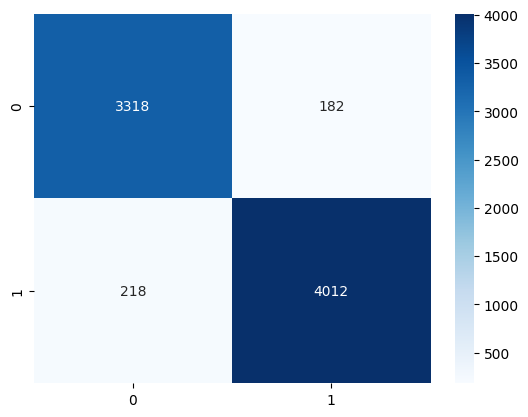

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Bag of Words
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

bow_pipeline.fit(X_train, y_train)
y_pred_bow = bow_pipeline.predict(X_test)

# Evaluate
print("Bag of Words Model")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))
sns.heatmap(confusion_matrix(y_test, y_pred_bow), annot=True, fmt='d', cmap='Blues')
plt.show()

In [26]:
print(X_train.shape)
print(X_test.shape)

(30917,)
(7730,)


## TF-IDF

TF-IDF Model
Accuracy: 0.9350582147477361
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3500
           1       0.92      0.97      0.94      4230

    accuracy                           0.94      7730
   macro avg       0.94      0.93      0.93      7730
weighted avg       0.94      0.94      0.93      7730



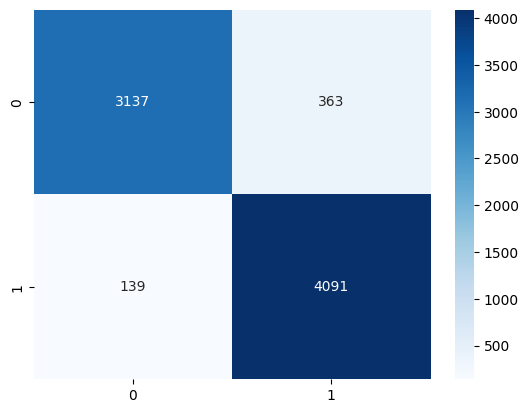

In [27]:
# TF-IDF
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

tfidf_pipeline.fit(X_train, y_train)
y_pred_tfidf = tfidf_pipeline.predict(X_test)

# Evaluate
print("TF-IDF Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))
sns.heatmap(confusion_matrix(y_test, y_pred_tfidf), annot=True, fmt='d', cmap='Blues')
plt.show()


## LST Model

Epoch 1/5
242/242 [==============================] - 28s 101ms/step - loss: 0.1641 - accuracy: 0.9407 - val_loss: 0.0689 - val_accuracy: 0.9748
Epoch 2/5
242/242 [==============================] - 13s 53ms/step - loss: 0.0462 - accuracy: 0.9862 - val_loss: 0.0637 - val_accuracy: 0.9797
Epoch 3/5
242/242 [==============================] - 6s 25ms/step - loss: 0.0299 - accuracy: 0.9916 - val_loss: 0.0922 - val_accuracy: 0.9736
Epoch 4/5
242/242 [==============================] - 8s 33ms/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.0686 - val_accuracy: 0.9792
Epoch 5/5
242/242 [==============================] - 2s 7ms/step - loss: 0.0827 - accuracy: 0.9781
LSTM Model
Test Accuracy: 0.9781371355056763


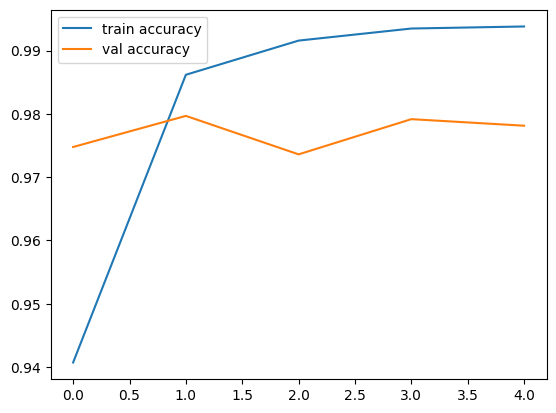

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=128, validation_data=(X_test_pad, y_test_cat))

# Evaluate
score = model.evaluate(X_test_pad, y_test_cat)
print("LSTM Model")
print("Test Accuracy:", score[1])

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


## Transformer Model

In [29]:
#!pip install --quiet transformers

In [30]:
#! pip install evaluate

In [31]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")


In [32]:
News['text'][0]

'donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year great year america donald j trump realdonaldtrump december trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan talbertswan december one like calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval alansandoval december us wo

In [33]:
News['text'] = News['text'].apply(preprocess_text)

In [34]:
News['text'][0]

'donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year great year america donald j trump realdonaldtrump december trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan talbertswan december one like calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval alansandoval december u wor

In [35]:
df_train, df_test = train_test_split(News, test_size=0.2, random_state=42, stratify=y)

Convert to HuggingFace Dataset

In [36]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)

In [37]:
from transformers import AutoTokenizer

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [38]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/30917 [00:00<?, ? examples/s]

Map:   0%|          | 0/7730 [00:00<?, ? examples/s]

In [39]:
from transformers import AutoModelForSequenceClassification

model_name = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

model.to(device)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

## Train the model

In [40]:
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [41]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=0.0001,
    per_device_train_batch_size=30,
    per_device_eval_batch_size=30,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy = "epoch",
    logging_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics

)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [42]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.064700,0.029231,0.989521
2,0.020000,0.037147,0.990944
3,0.011100,0.043514,0.993144
4,0.008100,0.036168,0.993790
5,0.004000,0.028478,0.995213
6,0.003000,0.030360,0.993661
7,0.001800,0.032914,0.994049
8,0.000400,0.043779,0.994696


Epoch,Training Loss,Validation Loss,Accuracy
1,0.064700,0.029231,0.989521
2,0.020000,0.037147,0.990944
3,0.011100,0.043514,0.993144
4,0.008100,0.036168,0.993790
5,0.004000,0.028478,0.995213
6,0.003000,0.030360,0.993661
7,0.001800,0.032914,0.994049
8,0.000400,0.043779,0.994696
9,0.000300,0.038766,0.994825
10,0.000100,0.038841,0.994696


TrainOutput(global_step=10310, training_loss=0.011349049110099254, metrics={'train_runtime': 6997.6433, 'train_samples_per_second': 44.182, 'train_steps_per_second': 1.473, 'total_flos': 4.069460891275906e+16, 'train_loss': 0.011349049110099254, 'epoch': 10.0})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13964
           1       1.00      1.00      1.00     16953

    accuracy                           1.00     30917
   macro avg       1.00      1.00      1.00     30917
weighted avg       1.00      1.00      1.00     30917



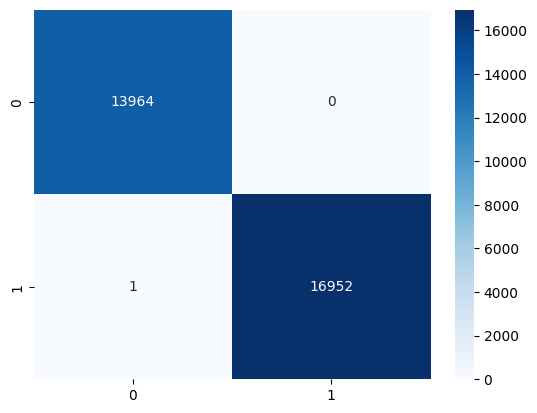

In [43]:
preds = trainer.predict(tokenized_train)
preds = np.argmax(preds[:3][0],axis=1)
GT = df_train['label'].tolist()
print(classification_report(GT,preds))
sns.heatmap(confusion_matrix(GT,preds), annot=True, fmt='d', cmap='Blues')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3491
           1       0.99      1.00      1.00      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



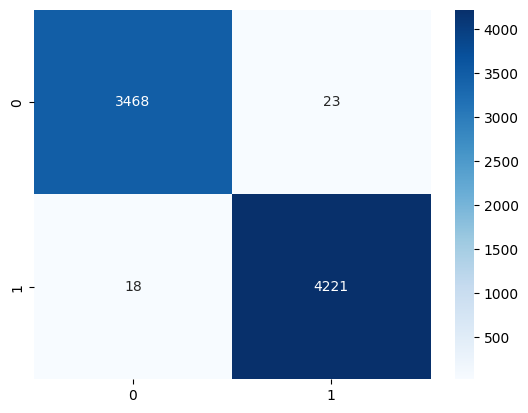

In [44]:
preds = trainer.predict(tokenized_test)
preds = np.argmax(preds[:3][0],axis=1)
GT = df_test['label'].tolist()
print(classification_report(GT,preds))
sns.heatmap(confusion_matrix(GT,preds), annot=True, fmt='d', cmap='Blues')
plt.show()

## Evaluating the model over different news

In [45]:
# Check if a GPU is available and move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

Defining a function to classify a user input with a news text

In [46]:
# Define text classification function
def classify_text(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=100)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Ensure the model is in evaluation mode
    model.eval()

    # Perform the forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits

    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(logits, dim=-1)

    # Get the predicted class
    predicted_class = torch.argmax(probabilities, dim=1).item()

    # Define the label mapping
    labels = ['False', 'True']  # Update according to your model's labels

    # Return the predicted label and probabilities
    predicted_label = labels[predicted_class]
    probabilities = probabilities.cpu().numpy()

    return predicted_label, probabilities



In [47]:
import torch

#Fake News
user_input = 'Maury is perhaps one of the trashiest shows on television today. It s right in line with the likes of the gutter trash that is Jerry Springer, and the fact that those shows are still on the air with the shit they air really is a sad testament to what Americans find to be entertaining. However, Maury really crossed the line with a Facebook post regarding one of their guest s appearance with a vile, disgusting caption on Tuesday evening.There was a young woman on there doing one of their episodes regarding the paternity of her child. However, on the page, the show posted an image of the woman, who happens to bear a striking resemblance to Senator and presidential candidate Ted Cruz. The caption from the Maury Show page read: The Lie Detector Test determined .that was a LIE! Ted Cruz is just NOT that SEXY! As if that weren t horrible enough, the caption underneath the Imgur upload reads, Ted Cruz in drag on Maury. Here is an image from the official Maury Facebook page:Here is the embed of the post itself:This is beyond despicable. It s bad enough that this show preys on desperate people to keep their trashy show going and their audience of bottom-feeders entertained, but now they publicly mock them as well? This young woman cannot help how she looks or who she resembles. That is not her fault. Shaming someone s looks on social media is something we d expect from the morons who watch this crap on a daily basis, but it is NOT something the official show page should be doing. Then again, what can you expect from a show that rolls in the mud for a living and continues to show the world that there is now low they will not stoop to? This was more than a step too far, though.Maury, you owe this young woman a public apology. A VERY public apology. There s just no excuse for this, no matter the demographics of your audience or what you do on that disgusting show of yours. I suppose it will be too much to ask that you lose viewers over this, because the people who watch your trashy ass show likely aren t educated enough to understand why this is so wrong in the first place. I don t watch, so I can t deprive you of my viewership, but I CAN call you out.Shame on you, Maury Show and everyone associated with this despicable Facebook post. You really showed your true colors here today.Featured image via Facebook'

predicted_label, probabilities = classify_text(user_input)
print(f"Predicted Label: {predicted_label}")
print(f"Probabilities: {probabilities}")


Predicted Label: False
Probabilities: [[9.9999475e-01 5.1943271e-06]]


In [48]:
import torch

#True News
user_input = """Mexican drug kingpin Ismael "El Mayo" Zambada and a son of his former partner, Joaquin "El Chapo" Guzman, were arrested on Thursday in El Paso, Texas, in a major coup for U.S. authorities that may also reshape the Mexican criminal landscape.
Zambada is one of the most consequential traffickers in Mexico's history and co-founded the Sinaloa Cartel with El Chapo, who was extradited to the U.S. in 2017 and is serving a life sentence in a maximum security prison.

Both Zambada and Joaquin Guzman Lopez, a son of El Chapo, face multiple charges in the U.S. for funneling huge quantities of fentanyl and other drugs to U.S. streets. Fentanyl overdoses have surged to become the leading cause of death for Americans between the ages of 18 and 45.
Zambada, who is believed to be in his 70s, and Guzman Lopez, who is in his 30s, were detained after landing in a private plane in the El Paso area.

Guzman Lopez lured Zambada to the U.S., according to three current and former U.S. officials familiar with the operation who sought anonymity to speak candidly about the events.
U.S. President Joe Biden on Friday heralded the arrests and vowed to continue combating drug trafficking.
"Too many of our citizens have lost their lives to the scourge of fentanyl. Too many families have been broken and are suffering because of this destructive drug," he said in a statement.

U.S. authorities have made drug bosses key targets, frequently striking plea bargain deals with them in exchange for information that leads to the capture of other high-ranking cartel figures.
Reuters could not immediately confirm a plea bargain deal had been struck, but if Zambada was betrayed by Guzman Lopez it could have major ramifications for the Sinaloa cartel.
A bloody inter-cartel war erupted in 2008 when another senior Sinaloa leader was detained. His family members accused El Chapo of orchestrating the arrest with Mexican authorities, triggering a violent fissure between two powerful factions of the crime group.
NEW GENERATION OF NARCOS
Guzman Lopez is one of four sons of El Chapo - known as Los Chapitos, or Little Chapos - who inherited their father's faction of the cartel. His brother, Ovidio Guzman, was arrested last year and extradited to the U.S.
In recent years, the Sinaloa cartel has become the biggest target for U.S. authorities, who have accused the crime syndicate of being the biggest supplier of fentanyl to the U.S.
Zambada and Guzman Lopez face multiple charges in the U.S. "for heading the cartel's criminal operations, including its deadly fentanyl manufacturing and trafficking networks," U.S. Attorney General Merrick Garland said in a statement.
The arrest of Guzman Lopez was first reported by Reuters, ahead of the Justice Department statement which confirmed they were detained in El Paso.
One worker at a Santa Teresa airport, near El Paso, on Thursday afternoon told Reuters he saw a Beechcraft King Air plane land on the runway, where federal agents were already waiting.
"Two individuals got off the plane ... and were calmly taken into custody," said the man, who declined to share his name out of concern for his safety.
"It seemed like a pretty calm, arranged thing," he added.
The U.S. authorities had a $15 million reward for Zambada's capture, while there was a $5 million bounty on Guzman Lopez.
The Sinaloa cartel traffics drugs to more than 50 countries around the globe and is one of the two most powerful organized crime groups in Mexico, according to U.S. authorities.
Zambada and El Chapo's sons belong to two different generations of traffickers, with differing styles.
Zambada is known for being an "old-school" narco, avoiding the limelight and operating in the shadows. El Chapo's sons, by contrast, have a reputation for being flashy narcos who courted attention as they ascended the ranks of the cartel.
El Chapo's sons are also known to be more violent and hot-headed than Zambada, who had a reputation as a shrewd operator.
Zambada and El Chapo's sons have had a fractious relationship since their father was extradited in 2017, and the arrests of Zambada and Guzman Lopez may trigger instability or even violence in their heartlands in the northern state of Sinaloa.
Their arrests were part of a joint operation by the Federal Bureau of Investigation and Homeland Security Investigations agencies, HSI said in a statement.
U.S. authorities have over the past year issued fresh indictments against Zambada and El Chapo's sons on new charges in the U.S. that focus on fentanyl smuggling, as well as the flow of precursor chemicals to the illicit labs operated by their crime syndicate.
Over decades, the cartel has set up sophisticated supply chains to move drugs across the globe and to source heavily regulated chemicals to their home base in Sinaloa.
On Thursday, Reuters published an investigation that revealed how fentanyl precursor chemicals are astonishingly easy and cheap to buy online from Chinese sellers that ship the substances on a door-to-door basis in North America.
"Fentanyl is the deadliest drug threat our country has ever faced, and the Justice Department will not rest until every single cartel leader, member, and associate responsible for poisoning our communities is held accountable," Garland said.
Mexico's Security Minister Rosa Rodriguez said on Friday that the Mexican government was informed by the U.S. government of the detentions, but that Mexican authorities did not participate in the operation.
"""

predicted_label, probabilities = classify_text(user_input)
print(f"Predicted Label: {predicted_label}")
print(f"Probabilities: {probabilities}")


Predicted Label: False
Probabilities: [[0.88164544 0.11835452]]


## Evaluation with a different dataset

In [49]:
from datasets import load_dataset

ds = load_dataset("GonzaloA/fake_news")

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/24353 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8117 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8117 [00:00<?, ? examples/s]

In [50]:
ds = ds.map(lambda x: {"text": preprocess_text(x["text"])})


Map:   0%|          | 0/24353 [00:00<?, ? examples/s]

Map:   0%|          | 0/8117 [00:00<?, ? examples/s]

Map:   0%|          | 0/8117 [00:00<?, ? examples/s]

In [51]:
tokenized_ds = ds.map(preprocess_function, batched=True)


Map:   0%|          | 0/24353 [00:00<?, ? examples/s]

Map:   0%|          | 0/8117 [00:00<?, ? examples/s]

Map:   0%|          | 0/8117 [00:00<?, ? examples/s]

In [52]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_eval_batch_size=32,
    logging_dir='./logs',
    logging_steps=10
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=tokenized_ds['test'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Evaluate the model
results = trainer.evaluate()

# Print the evaluation results
print(f"Accuracy: {results['eval_accuracy']}")

# Optionally, print a detailed classification report
predictions = trainer.predict(tokenized_ds['test']).predictions
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = tokenized_ds['test']['label']
print(classification_report(true_labels, predicted_labels, target_names=['False', 'True']))


Accuracy: 0.9804114820746581
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      3782
        True       0.99      0.97      0.98      4335

    accuracy                           0.98      8117
   macro avg       0.98      0.98      0.98      8117
weighted avg       0.98      0.98      0.98      8117



In [55]:
trainer.save_model('fake_news')

In [58]:
# prompt: save model to google drive

!cp -r ./fake_news /content/drive/MyDrive/


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Trying with random news



Fake news generated from ChatGPT:

In a groundbreaking new study, scientists from the National Health Institute have discovered that consuming chocolate can effectively cure the common cold. This unexpected finding has stunned the medical community and sparked widespread excitement among chocolate lovers worldwide.

According to Dr. John Smith, the lead researcher, the study involved a double-blind trial with 1,000 participants who were given either chocolate or a placebo. The results showed that 80% of those who consumed chocolate reported a significant reduction in cold symptoms within 48 hours, compared to only 20% in the placebo group.

"We were amazed by the results," said Dr. Smith. "Chocolate contains a unique compound called theobromine, which appears to have powerful antiviral properties. This could revolutionize the way we treat the common cold."

The study also revealed that dark chocolate was particularly effective, due to its higher concentration of theobromine. Milk chocolate and white chocolate showed less pronounced effects.

This discovery has led to calls for chocolate to be stocked in pharmacies and used as a standard treatment for colds. Major chocolate manufacturers are already planning to produce special "medicinal chocolate" bars to capitalize on the findings.

However, not everyone is convinced. Dr. Jane Doe, a prominent nutritionist, cautioned against overconsumption of chocolate, noting its high sugar and fat content. "While this study is intriguing, we must be careful not to encourage unhealthy eating habits," she said.

The National Health Institute plans to conduct further research to confirm the findings and explore the potential of chocolate as a treatment for other viral infections.

In the meantime, chocolate lovers have a new reason to indulge, and the old saying "an apple a day keeps the doctor away" might soon be replaced with "a chocolate bar a day keeps the cold at bay."

In [53]:
user_input = input("Enter the news text for evaluation: ")

predicted_label, probabilities = classify_text(user_input)
print(f"Predicted Label: {predicted_label}")



Enter the news text for evaluation: In a groundbreaking new study, scientists from the National Health Institute have discovered that consuming chocolate can effectively cure the common cold. This unexpected finding has stunned the medical community and sparked widespread excitement among chocolate lovers worldwide.  According to Dr. John Smith, the lead researcher, the study involved a double-blind trial with 1,000 participants who were given either chocolate or a placebo. The results showed that 80% of those who consumed chocolate reported a significant reduction in cold symptoms within 48 hours, compared to only 20% in the placebo group.  "We were amazed by the results," said Dr. Smith. "Chocolate contains a unique compound called theobromine, which appears to have powerful antiviral properties. This could revolutionize the way we treat the common cold."  The study also revealed that dark chocolate was particularly effective, due to its higher concentration of theobromine. Milk choc

Real News from Reuters

https://www.reuters.com/world/europe/vandals-target-frances-high-speed-rail-network-olympics-get-underway-2024-07-26/

In [54]:
user_input = input("Enter the news text for evaluation: ")

predicted_label, probabilities = classify_text(user_input)
print(f"Predicted Label: {predicted_label}")



Enter the news text for evaluation: PARIS, July 26 (Reuters) - Saboteurs struck France's TGV high-speed train network in a series of pre-dawn attacks across the country, causing travel chaos and exposing security gaps ahead of the Paris Olympics opening ceremony later on Friday. The coordinated sabotage took place as France mounted a massive security operation, opens new tab involving tens of thousands of police and soldiers to safeguard the capital for the sporting extravaganza, sucking in security resources from across the country. Advertisement · Scroll to continue  Report this ad SNCF, the state-owned railway operator, said vandals had damaged signal substations and cables along the lines connecting Paris with cities such as Lille in the north, Bordeaux in the west and Strasbourg in the east. Another attack on the Paris-Marseille line was foiled. There was no immediate claim of responsibility for the attacks on the high-speed rail network, which is a source of national pride for ma

# Conclusion

**Summary of Model Performance**

1. DistilBERT (Transformer Model) on Test Dataset
  * Accuracy: 0.99
  * Precision:
    * Fake (0): 0.99
    * Real (1): 0.99
  * Recall:
    * Fake (0): 0.99
    * Real (1): 1.00
  * F1-Score:
    * Fake (0): 0.99
    * Real (1): 1.00
2. DistilBERT (Transformer Model) on Different Dataset
  * Accuracy: 0.98
  * Precision:
    * False: 0.97
    * True: 0.99
  * Recall:
    * False: 0.99
    * True: 0.97
  * F1-Score:
    * False: 0.98
    * True: 0.98
2. LSTM Model
  * Test Accuracy: 0.98
  * Epoch Accuracy:
    * Epoch 1: 0.938
    * Epoch 5: 0.9965
  * Final Test Accuracy: 0.979
3. TF-IDF with Naive Bayes
  * Accuracy: 0.94
  * Precision:
    * Fake (0): 0.96
    * Real (1): 0.92
  * Recall:
    * Fake (0): 0.90
    * Real (1): 0.97
  * F1-Score:
    * Fake (0): 0.93
    * Real (1): 0.94
4. Bag of Words with Naive Bayes
  * Accuracy: 0.95
  * Precision:
    * Fake (0): 0.94
    * Real (1): 0.96
  * Recall:
    * Fake (0): 0.95
    * Real (1): 0.95
  * F1-Score:
    * Fake (0): 0.94
    * Real (1): 0.95

**Comparative Analysis**

* **DistilBERT (Transformer Model)**: Given the new results, DistilBERT stands out as the best performer with extremely high accuracy and balanced precision and recall across both datasets. This model is recommended for applications where high accuracy is crucial and computational resources are available.

* **LSTM Model**: Still a strong performer with high accuracy and robust performance. It remains a viable option, particularly if sequential data handling is required.

* **Bag of Words with Naive Bayes**: A good alternative for simpler implementations with fast training and high accuracy.

* **TF-IDF with Naive Bayes**: An effective model, but it ranks lower compared to the other three in terms of performance.

**Conclusion**

With the updated performance metrics, DistilBERT is clearly the best-performing model for classifying fake and real news articles, offering near-perfect accuracy and robust precision and recall. If computational resources allow, DistilBERT should be the model of choice. For simpler and faster implementations, the Bag of Words model is still a strong contender, while the LSTM model provides a balance between complexity and performance.
